KeyboardInterrupt: 

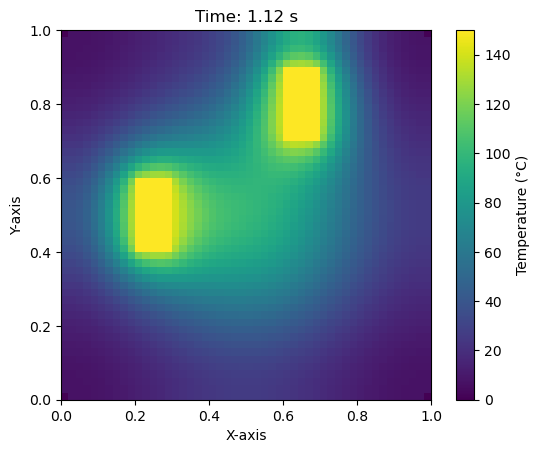

In [6]:
#This is base code for heat simulation
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
alpha = 0.01        # Thermal diffusivity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Time parameters
total_time = 5.0    # Total simulation time (seconds)
num_time_steps = 500
dt = total_time / num_time_steps

# Define a function for the initial temperature distribution (Gaussian at the center)
def initial_temperature_distribution(x, y):
    x_center = length_x / 2
    y_center = length_y / 2
    sigma_x = length_x / 5
    sigma_y = length_y / 5
    return 150 * np.exp(-((x - x_center)**2 / (2 * sigma_x**2) + (y - y_center)**2 / (2 * sigma_y**2)))

# Initial temperature distribution
initial_temperature = initial_temperature_distribution(X, Y)

# Define heat sources
heat_source_1 = {   
    'position_x': [0.4, 0.6],
    'position_y': [0.2, 0.3],
    'temperature': 150.0
}

heat_source_2 = {
    'position_x': [0.7, 0.9],
    'position_y': [0.6, 0.7],
    'temperature': 150.0
}

# Track the temperature at the center of the heat source
center_temperature_history = []

# Create plot
fig, ax = plt.subplots()
plot = ax.imshow(initial_temperature, extent=[0, length_x, 0, length_y], origin='lower', cmap='viridis', vmin=0, vmax=150)
ax.set_title('2D Heat Equation Solver')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
cbar = plt.colorbar(plot, ax=ax, label='Temperature (°C)')

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to update the plot for each time step
def update(frame):
    global updated_temperature, initial_temperature
    # Finite difference solution
    updated_temperature = initial_temperature.copy()

    # Apply diffusion to the entire plate
    updated_temperature[1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

    # Apply Dirichlet boundary conditions for each heat source
    for source in [heat_source_1, heat_source_2]:
        source_x_start = int(source['position_x'][0] * num_points_x)
        source_x_end = int(source['position_x'][1] * num_points_x)
        source_y_start = int(source['position_y'][0] * num_points_y)
        source_y_end = int(source['position_y'][1] * num_points_y)

        # Add the source temperature only from frame 50 to frame 199
        if 50 <= frame < 200:
            
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] = 150

    # Do nothing at frame 200
    if frame == 200:
        pass

    # Apply diffusion after frame 200
    if frame > 200:
        updated_temperature[1:-1, 1:-1] += alpha * dt * (
            (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
            (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)
        

    # Apply Dirichlet boundary conditions at t=0
    if frame == 0:
        updated_temperature[:, 0] = 0.0  # Left boundary
        updated_temperature[:, -1] = 0.0  # Right boundary
        updated_temperature[0, :] = 0.0  # Top boundary
        updated_temperature[-1, :] = 0.0  # Bottom boundary

    # Apply Neumann boundary conditions for subsequent time steps
    else:
        updated_temperature[0, 1:-1] = updated_temperature[1, 1:-1]  # Top boundary
        updated_temperature[-1, 1:-1] = updated_temperature[-2, 1:-1]  # Bottom boundary
        updated_temperature[1:-1, 0] = updated_temperature[1:-1, 1]  # Left boundary
        updated_temperature[1:-1, -1] = updated_temperature[1:-1, -2]  # Right boundary

        # Apply constraints
        updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
        updated_temperature[updated_temperature > np.max([heat_source_1['temperature'], heat_source_2['temperature']])] = np.max([heat_source_1['temperature'], heat_source_2['temperature']])
        # Temperature should not be higher than the source or heat exchange will not continue

    # Update initial temperature for the next iteration
    initial_temperature = updated_temperature.copy()

    # Update plot data
    plot.set_data(updated_temperature)
    ax.set_title(f'Time: {frame * dt:.2f} s')
    display(fig)  # Display the updated plot inline
    clear_output(wait=True)  # Clear the previous output for a clean display
    time.sleep(0.01)  # Add a small delay between frames for better visualization

# Display each frame in line
for frame in range(num_time_steps):
    update(frame)
    time.sleep(0.01)  # Add a small delay between frames


KeyboardInterrupt: 

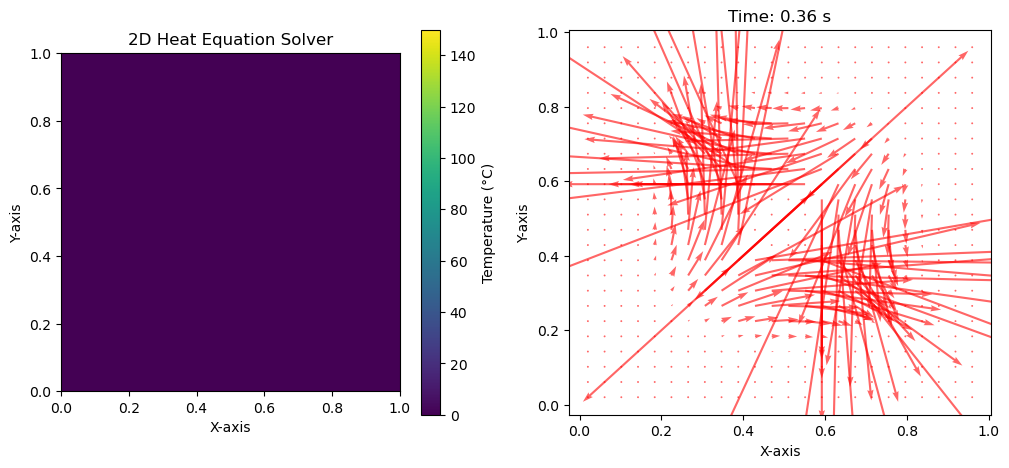

In [4]:
#Vector plot for 2d case. The temperature is steepest at the corner. Such steep change restricts the life building blocks to a small area.
#A little pertubation will move these particles to places have different temperature.
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
alpha = 0.01        # Thermal diffusivity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Time parameters
total_time = 5.0    # Total simulation time (seconds)
num_time_steps = 500
dt = total_time / num_time_steps

# Define a function for the initial temperature distribution (Gaussian at the center)
def initial_temperature_distribution(x, y):
    x_center = length_x / 2
    y_center = length_y / 2
    sigma_x = length_x / 5
    sigma_y = length_y / 5
    return 0 * np.exp(-((x - x_center)**2 / (2 * sigma_x**2) + (y - y_center)**2 / (2 * sigma_y**2)))

# Initial temperature distribution
initial_temperature = initial_temperature_distribution(X, Y)

# Define heat source at the center
heat_source = {   
    'position_x': [0.4, 0.6],  # Center of the domain
    'position_y': [0.4, 0.6],  # Center of the domain
    'temperature': 200.0
}

# Track the temperature at the center of the heat source
center_temperature_history = []

# Create plot
fig, (ax, ax_quiver) = plt.subplots(1, 2, figsize=(12, 5))

plot = ax.imshow(initial_temperature, extent=[0, length_x, 0, length_y], origin='lower', cmap='viridis', vmin=0, vmax=150)
ax.set_title('2D Heat Equation Solver')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
cbar = plt.colorbar(plot, ax=ax, label='Temperature (°C)')

# Initialize updated_temperature and initial_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Set arrow width
arrow_width = 0.005

# Initialize quiver plot with adjusted parameters
quiver_plot = ax_quiver.quiver(X[1:-1:2, 1:-1:2].flatten(), Y[1:-1:2, 1:-1:2].flatten(),
                               np.zeros_like(X[1:-1:2, 1:-1:2]).flatten(), np.zeros_like(Y[1:-1:2, 1:-1:2]).flatten(),
                               scale_units='xy', angles='xy', color='r', alpha=0.6, width=arrow_width)

ax_quiver.set_title('Temperature Gradient Arrows')
ax_quiver.set_xlabel('X-axis')
ax_quiver.set_ylabel('Y-axis')

# Function to update the contour plot for each time step
def update_contour(frame):
    global updated_temperature, initial_temperature

    # Finite difference solution
    updated_temperature = initial_temperature.copy()

    # Apply diffusion to the entire plate
    updated_temperature[1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

    # Apply Dirichlet boundary conditions for the heat source
    source_x_start = int(heat_source['position_x'][0] * num_points_x)
    source_x_end = int(heat_source['position_x'][1] * num_points_x)
    source_y_start = int(heat_source['position_y'][0] * num_points_y)
    source_y_end = int(heat_source['position_y'][1] * num_points_y)

    # Add the source temperature only from frame 50 to frame 300
    if 0 <= frame < 450:
        updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] = 150

    # Do nothing at frame 499
    if frame == 499:
        pass

    # Apply diffusion after frame 499
    if frame > 499:
        updated_temperature[1:-1, 1:-1] += alpha * dt * (
            (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
            (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

    # Apply Dirichlet boundary conditions at t=0
    if frame == 0:
        updated_temperature[:, 0] = 0.0  # Left boundary
        updated_temperature[:, -1] = 0.0  # Right boundary
        updated_temperature[0, :] = 0.0  # Top boundary
        updated_temperature[-1, :] = 0.0  # Bottom boundary

    # Apply Neumann boundary conditions for subsequent time steps
    else:
        updated_temperature[0, 1:-1] = updated_temperature[1, 1:-1]  # Top boundary
        updated_temperature[-1, 1:-1] = updated_temperature[-2, 1:-1]  # Bottom boundary
        updated_temperature[1:-1, 0] = updated_temperature[1:-1, 1]  # Left boundary
        updated_temperature[1:-1, -1] = updated_temperature[1:-1, -2]  # Right boundary

        # Apply constraints
        updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
        updated_temperature[updated_temperature > heat_source['temperature']] = heat_source['temperature']
        # Temperature should not be higher than the source or heat exchange will not continue

    # Update initial temperature for the next iteration
    initial_temperature = updated_temperature.copy()

    # Calculate temperature gradient
    grad_x, grad_y = np.gradient(updated_temperature, dx, dy)

    # Calculate the scaling factor
    desired_max_arrow_length = 0.1
    scaling_factor = calculate_scaling_factor(grad_x, grad_y, dx, dy, desired_max_arrow_length)

    # Update quiver plot data
    quiver_plot.set_UVC(grad_x[1:-1:2, 1:-1:2].flatten() * scaling_factor, grad_y[1:-1:2, 1:-1:2].flatten() * scaling_factor)

    # Update plot title
    ax_quiver.set_title(f'Time: {frame * dt:.2f} s')

    display(fig)  # Display the updated plot inline
    clear_output(wait=True)  # Clear the previous output for a clean display
    time.sleep(0.01)  # Add a small delay between frames

# Display each frame in line
for frame in range(num_time_steps):
    update_contour(frame)
    time.sleep(0.01)  # Add a small delay between frames


interactive(children=(IntSlider(value=0, description='frame', max=5000), FloatSlider(value=0.5, description='x…

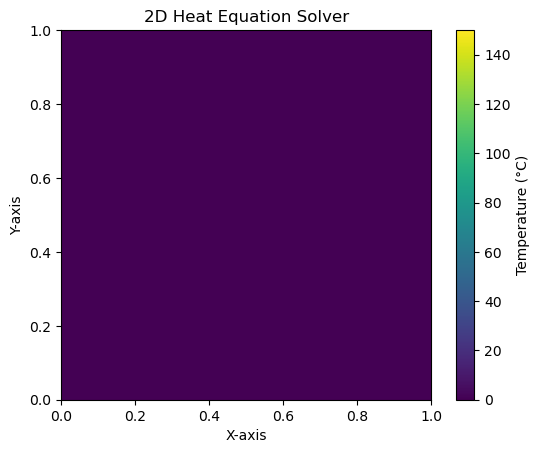

In [1]:
#2D heat equation solver
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
alpha = 0.01        # Thermal diffusivity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Time parameters
total_time = 5.0    # Total simulation time (seconds)
num_time_steps = 5000
dt = total_time / num_time_steps

# Define a function for the initial temperature distribution (Gaussian at the center)
def initial_temperature_distribution(x, y):
    x_center = length_x / 2
    y_center = length_y / 2
    sigma_x = length_x / 5
    sigma_y = length_y / 5
    return 0 * np.exp(-((x - x_center)**2 / (2 * sigma_x**2) + (y - y_center)**2 / (2 * sigma_y**2)))

# Initial temperature distribution
initial_temperature = initial_temperature_distribution(X, Y)

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to update the plot for each time step
def update(frame, x, y):
    global updated_temperature, initial_temperature
    # Reset to the initial temperature for each frame
    updated_temperature = initial_temperature.copy()

    # Finite difference solution
    for _ in range(frame):
        # Apply diffusion to the entire plate
        updated_temperature[1:-1, 1:-1] += alpha * dt * (
            (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
            (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

        # Apply Dirichlet boundary conditions for the heat source
        source_x_start = int(heat_source_1['position_x'][0] * num_points_x)
        source_x_end = int(heat_source_1['position_x'][1] * num_points_x)
        source_y_start = int(heat_source_1['position_y'][0] * num_points_y)
        source_y_end = int(heat_source_1['position_y'][1] * num_points_y)

        # Add the source temperature only from frame 50 to frame 199
        if 0 <= _ < 499:
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] = 150

        # Apply diffusion after frame 499
        if _ > 499:
            updated_temperature[1:-1, 1:-1] += alpha * dt * (
                (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
                (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

            # Track temperature at the center of heat_source_1
            center_temperature_history.append(updated_temperature[int(0.5 * num_points_x), int(0.5 * num_points_y)])

        # Apply Dirichlet boundary conditions at t=0
        if _ == 0:
            updated_temperature[:, 0] = 0.0  # Left boundary
            updated_temperature[:, -1] = 0.0  # Right boundary
            updated_temperature[0, :] = 0.0  # Top boundary
            updated_temperature[-1, :] = 0.0  # Bottom boundary

        # Apply Neumann boundary conditions for subsequent time steps
        else:
            updated_temperature[0, 1:-1] = updated_temperature[1, 1:-1]  # Top boundary
            updated_temperature[-1, 1:-1] = updated_temperature[-2, 1:-1]  # Bottom boundary
            updated_temperature[1:-1, 0] = updated_temperature[1:-1, 1]  # Left boundary
            updated_temperature[1:-1, -1] = updated_temperature[1:-1, -2]  # Right boundary

            # Apply constraints
            updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative

    # Display temperature at the specified point
    arbitrary_point_temperature = updated_temperature[int(x * num_points_x), int(y * num_points_y)]
    print(f'Temperature at ({x}, {y}) at frame {frame}: {arbitrary_point_temperature}')

# Create interactive sliders for frame, x, and y
@interact(frame=widgets.IntSlider(min=0, max=num_time_steps, step=1, value=0),
          x=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5),
          y=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5))
def update_and_display(frame, x, y):
    update(frame, x, y)

# Show the initial plot
plt.imshow(initial_temperature, extent=[0, length_x, 0, length_y], origin='lower', cmap='viridis', vmin=0, vmax=150)
plt.title('2D Heat Equation Solver')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar(label='Temperature (°C)')
plt.show()



In [4]:
#This code tests whether there is thermal equilibrium by calculating std.
#We see std does not converge in simulation, there is no equilibrium in short time as long as there is heat source. 
#The only way to reach equilibrium is all points temp=source temp. But this is not possible for life to start.
#The other option is to have something as a cooler to control the temperature not to be too hot......
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
alpha = 0.01        # Thermal diffusivity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Time parameters
total_time = 20.0    # Total simulation time (seconds)
num_time_steps = 2000
dt = total_time / num_time_steps

# Define a function for the initial temperature distribution (Gaussian at the center)
def initial_temperature_distribution(x, y):
    x_center = length_x / 2
    y_center = length_y / 2
    sigma_x = length_x / 5
    sigma_y = length_y / 5
    return 0 * np.exp(-((x - x_center)**2 / (2 * sigma_x**2) + (y - y_center)**2 / (2 * sigma_y**2)))

# Initial temperature distribution
initial_temperature = initial_temperature_distribution(X, Y)

# Define heat source at the center
heat_source_center = {   
    'position_x': [0.4, 0.6],
    'position_y': [0.4, 0.6],
    'temperature': 150.0
}

# Track the standard deviation of temperature for equilibrium check
equilibrium_std_history = []

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to update the plot for each time step
def update(frame):
    global updated_temperature, equilibrium_std_history

    # Apply diffusion to the entire plate
    updated_temperature[1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

    # Apply Dirichlet boundary conditions for the heat source at the center
    source_x_start = int(heat_source_center['position_x'][0] * num_points_x)
    source_x_end = int(heat_source_center['position_x'][1] * num_points_x)
    source_y_start = int(heat_source_center['position_y'][0] * num_points_y)
    source_y_end = int(heat_source_center['position_y'][1] * num_points_y)

    # Add the source temperature only from frame 0 to frame 5998
    if 0 <= frame < 1999:
        updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] = 150

    # Apply diffusion after frame 5999
    if frame >= 1999:
        updated_temperature[1:-1, 1:-1] += alpha * dt * (
            (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
            (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

        # Track the standard deviation of temperature across all points
        equilibrium_std_history.append(np.std(updated_temperature))

# Display each frame in line
frame = 0  # Start from 0

while frame <= num_time_steps:  # Adjust the loop condition based on your requirement
    update(frame)

    # Print the standard deviation at regular intervals
    if frame % 100 == 0:
        temperature_std = np.std(updated_temperature)
        print(f'Standard Deviation at frame {frame}: {temperature_std}')

    time.sleep(0.01)  # Add a small delay between frames

    # If equilibrium is not reached, increase frame counter
    frame += 1

# Print the number of frames simulated
print(f"Number of frames simulated: {frame}")


Standard Deviation at frame 0: 29.393876913398138
Standard Deviation at frame 100: 37.44748275917808
Standard Deviation at frame 200: 38.670007848011345
Standard Deviation at frame 300: 39.17471271799115
Standard Deviation at frame 400: 39.498614702487934
Standard Deviation at frame 500: 39.720089981810496
Standard Deviation at frame 600: 39.86734539626125
Standard Deviation at frame 700: 39.96235796407319
Standard Deviation at frame 800: 40.02240627732615
Standard Deviation at frame 900: 40.05986442614366
Standard Deviation at frame 1000: 40.08304370821573
Standard Deviation at frame 1100: 40.09731690956414
Standard Deviation at frame 1200: 40.106079718939014
Standard Deviation at frame 1300: 40.111449709188335
Standard Deviation at frame 1400: 40.114736869393944
Standard Deviation at frame 1500: 40.116747691966566
Standard Deviation at frame 1600: 40.11797724395764
Standard Deviation at frame 1700: 40.118728884685666
Standard Deviation at frame 1800: 40.119188301294365
Standard Devia

Number of frames simulated: 779
System reached equilibrium.


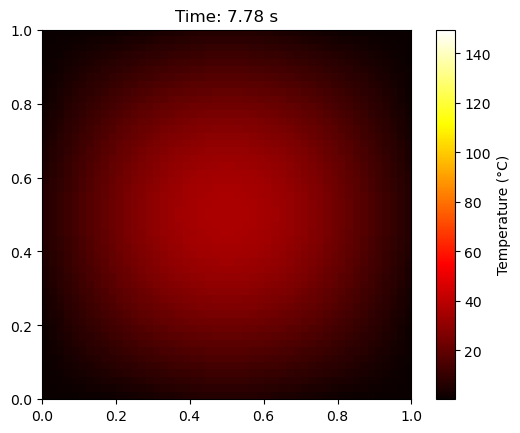

In [5]:
#First option:the heat source is shut off for some time. We see if the vent is periodic, there is possibility for std to converge (see this simulation)
#The criteria is the temperature std of all points is smaller than 10.
#Since temperature is not stable in source area,life can emerge on the corners.
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
alpha = 0.01        # Thermal diffusivity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Time parameters
total_time = 60.0    # Total simulation time (seconds)
num_time_steps = 6000
dt = total_time / num_time_steps

# Define a function for the initial temperature distribution (Gaussian at the center)
def initial_temperature_distribution(x, y):
    x_center = length_x / 2
    y_center = length_y / 2
    sigma_x = length_x / 5
    sigma_y = length_y / 5
    return 150 * np.exp(-((x - x_center)**2 / (2 * sigma_x**2) + (y - y_center)**2 / (2 * sigma_y**2)))

# Initial temperature distribution
initial_temperature = initial_temperature_distribution(X, Y)

# Define heat sources
heat_source_1 = {   
    'position_x': [0.4, 0.6],
    'position_y': [0.2, 0.3],
    'temperature': 150.0
}

heat_source_2 = {
    'position_x': [0.7, 0.9],
    'position_y': [0.6, 0.7],
    'temperature': 150.0
}

# Track the temperature at the center of the heat source
center_temperature_history = []

# Track the standard deviation of temperature for equilibrium check
equilibrium_std_history = []
# Initialize a list to store center temperatures at every 10 frames
center_temperature_at_10_frames = []
# Flag to indicate whether the heat source has been removed
heat_source_removed = False

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Set up the plot
fig, ax = plt.subplots()
plot = ax.imshow(updated_temperature, cmap='hot', extent=[0, length_x, 0, length_y], origin='lower')
ax.set_title('Initial Temperature Distribution')
plt.colorbar(plot, label='Temperature (°C)')

# Function to update the plot for each time step
def update(frame):
    global updated_temperature, heat_source_removed, equilibrium_std_history

    # Apply diffusion to the entire plate
    updated_temperature[1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

    # Apply Dirichlet boundary conditions for each heat source
    for source in [heat_source_1, heat_source_2]:
        source_x_start = int(source['position_x'][0] * num_points_x)
        source_x_end = int(source['position_x'][1] * num_points_x)
        source_y_start = int(source['position_y'][0] * num_points_y)
        source_y_end = int(source['position_y'][1] * num_points_y)

        # Add the source temperature only from frame 50 to frame 199
        if 50 <= frame < 200 and not heat_source_removed:
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end] = 150

    # Apply diffusion after frame 200
    if frame >= 200:
        updated_temperature[1:-1, 1:-1] += alpha * dt * (
            (updated_temperature[:-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[2:, 1:-1]) / dx**2 +
            (updated_temperature[1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1] + updated_temperature[1:-1, 2:]) / dy**2)

        # Track the standard deviation of temperature across all points
        equilibrium_std_history.append(np.std(updated_temperature))

    # Check for equilibrium after frame 200
    if frame > 200:
        # Print the standard deviation for debugging
        if frame % 10 == 1:  # Check every 10 frames
            print(f'Standard Deviation at frame {frame}: {equilibrium_std_history[-1]}')

        # Check if the standard deviation is smaller than 10
        if equilibrium_std_history[-1] < 10:
            return True  # Equilibrium reached

    return False  # Equilibrium not reached yet

# Display each frame in line
frame = 501  # Start from 501
start_time = time.time()  # Record the start time
equilibrium_reached = False  # Initialize equilibrium_reached outside the loop

while frame <= num_time_steps:  # Adjust the loop condition based on your requirement
    if update(frame):
        equilibrium_reached = True
        break

    time.sleep(0.01)  # Add a small delay between frames

    # Update plot data
    plot.set_data(updated_temperature)
    ax.set_title(f'Time: {frame * dt:.2f} s')
    display(fig)
    clear_output(wait=True)
    time.sleep(0.01)

    # If equilibrium is not reached, increase frame counter
    frame += 1

# Print the number of frames simulated
print(f"Number of frames simulated: {frame}")

# Check if equilibrium is reached by the end of the simulation
if equilibrium_reached:
    print("System reached equilibrium.")
else:
    print("Equilibrium not reached within the given simulation time.")


In [ ]:
#This is somehow hard, since it is like an automated system, where one put a temperature detector at some places
#and adjust the source frequency (on/off) to maintain the temperature at that point.
#we will see this next week.